## **AUDIO FAILIST MUUSIKAPALA ŽANRI ENNUSTAMINE**

### **Ahto Järve, Meeli Mets**

## SISSEJUHATUS, VIITED ja MÕISTED

Projekti eesmärk on luua töövoog, mille abil saaks mp3 failist teada, mis žanri muusikaga tegu on. See võimaldab näiteks mingil platvormil kategoriseerida muusikat ilma, et sellel oleks metaandmetes tema žanr kirjas.




**Music Audio Benchmark Data Set:** https://www-ai.cs.tu-dortmund.de/audio.html
Siit leheküljelt laadisime alla mudeli treenimiseks ja testimiseks kasutatud mp3 failid. Need lood olid 10 sekundi pikkused väljavõtted lauludest. Nad olid kategoriseeritud kataloogidesse žanrite kaupa. Kokku laadisime alla 1884 faili. Lood on võetud garageband.com -ist ning need lood ei ole ühiskonnas tuntud.

**Tööriist, millega muusikafailidest kätte saada audio tunnused:** https://essentia.upf.edu/streaming_extractor_music.html
Selgus, et audiofaile on kirjeldatud ligi 60 erineva tunnuse kaudu. Lisasime iga uue katse puhul mõned tunnused juurde, kuid jõudluse mõttes jäime 14 tunnuse juurde.




**Audio tunnused, mida ennustusmudelis kasutasime:**

**average_loudness**: annab ülevaate muusikapala üldisest helitugevusest. See skaleerib keskmise helitugevuse ümber normaliseeritud vahemikku [0, 1], mis tähistab dünaamilist vahemikku. See võib olla abiks muusika tajutava helitugevuse ja intensiivsuse mõistmisel.

**BPM (Beats Per Minute) ehk tempo**: näitab muusika tempot või kiirust, näidates löökide arvu ühes minutis. Erinevatel žanritel on tavaliselt erinevad harmoonilised omadused, näiteks teatud helikõrgusklasside või tonaalsuste esiletõstmine.

**energy**: peegeldab muusika tajutavat intensiivsust ja aktiivsuse taset. Kõrgemad väärtused näitavad energilisemat muusikat. Näiteks rokkmuusikas võib olla kõrgem energiatase, samas kui ambient-muusika võib olla madalama energiatasemega. Ühik: vahemikus 0 kuni 1.

**beats_loudness**: näitab muusika löökide valjusust. Ühik vahemikus 0 kuni 1.

**silence_rate_60dB**: mõõdab vaiksete või madala helitugevusega segmentide osakaalu muusikas. See näitab vaikse taset või heli puudumist. Ühik: vahemikus 0 kuni 1.

**danceability**: hindab erinevate muusikaliste elementide põhjal muusika sobivuse tantsimiseks. Kõrgemad väärtused näitavad tantsulisemat muusikat. Ühik: vahemikus 0 kuni 1.

**chords_changes_rate**: akordide muutumise kiirust muusikas, mis näitab harmoonilist keerukust või edenemist. Akordide muutuste kiirus võib eristada erinevaid muusikažanre, kuna erinevatel žanritel on erinevad harmoonilised struktuurid. Näiteks džässmuusikas võib olla rohkem akordimuutusi, samas kui popmuusikas võib olla rohkem kordusi. Ühik: akordivahetuste arv sekundis.

**melbands_spread**: annab teavet tooniomaduste või helikõrguse variatsiooni kohta. See omadus annab aimu muusika meloodilisest ulatusest või variatsioonist. Mõned žanrid, nagu klassikaline või džäss, võivad sisaldada laiemat meloodilist spektrit, samas kui teised žanrid, nagu techno või elektrooniline muusika, võivad olla kitsama meloodilise levikuga.

**hpcp_entropy**: mõõdab muusika harmoonilise helikõrguse klassi profiili (HPCP) entroopiat või ettearvamatust. See näitab harmoonilise sisu mitmekesisust või keerukust.

**barkbands_crest**: kirjeldab muusikas esinevate kooreribade hariteguri. See tähistab piigi amplituudi ja keskmise amplituudi suhet igas kooreribas.

**dissonants**: kirjeldab tajutavat dissonantsi või harmoonia puudumist muusikas. Kõrgemad väärtused näitavad dissonantsemat muusikat.

**bpm_histogram_first_peak_weight**: annab teavet muusika esmase tempo või rütmi kohta.

**zerocrossingrate**: mõõdab kiirust, millega heli lainekuju ületab amplituudi nulltaseme. See peegeldab helisignaali muutuste või üleminekute taset.

**spectral_entropy**: kirjeldab muusika spektraalse sisu entroopiat või ettearvamatust. See näitab sageduskomponentide mitmekesisust või keerukust.


## ANDMETE ETTEVALMISTUS JA PUHASTAMINE

Skript, mis extractib mp3 failist tunnused. Skript on tehtud, et ükshaaval ei peaks faile tööriistast läbi laskma. Skriptis tuleb folder_path muuta selleks teeks, kus kaustas mp3 failid asuvad. Skript tuleb salvestada enda arvutisse .py laiendina ning käima panna command promptis. Skript laseb kõik mp3 failid, mis kaustas on üksteise järel streaming_extractor_music tööriistast läbi. Tööriist peab asuma samas kaustas, kus asub skript.
Skript tekitab iga mp3 faili kohta sama nimega txt faili, kus sees on json formaadis andmed

In [ ]:
#DON'T run in google colab
import os
import subprocess

# Folder path containing the songs
#Change the path according
folder_path = r"C:\MUUSIKA_EXTRACT\alternative"

# Get a list of filenames in the folder
song_list = os.listdir(folder_path)

# Filter out non-MP3 files
song_list = [filename for filename in song_list if filename.endswith(".mp3")]

# Loop through the song list
for song in song_list:
    song_path = os.path.join(folder_path, song)
    output_filename = os.path.splitext(song)[0] + ".txt"
    output_path = os.path.join(folder_path, output_filename)

    command = f".\\streaming_extractor_music.exe {song_path} {output_path}"

    # Run the command
    subprocess.run(command, shell=True)

    print(f"Processed {song} and saved output to {output_filename}")


Skript mis võtab saadud tekstifailist meile vajalikud tunnused ning lisab genre tunnuse (allalaetud failid on žanriga nimetatud kaustas). Skript kogub andmed kõigist määratud kaustas olevatest tekstifailidest. Iga žanri kohta peab olema eraldi kaust ja iga kausta kohta tuleb skript uuesti käivitada

In [ ]:
#DON'T run this in colab
import json
import csv
import os

# Folder path containing the songs, change this according to folder
folder_path = r"C:\MUUSIKA_EXTRACT\rock"

# Get a list of filenames in the folder
json_list = os.listdir(folder_path)

# Filter out non-txt files
json_list = [filename for filename in json_list if filename.endswith(".txt")]

# Prepare the data list
table_data = []

# Loop through the JSON files
for file_name in json_list:
    file_path = os.path.join(folder_path, file_name)
    with open(file_path) as file:
        # Open the JSON file
        json_data = json.load(file)

    # Extract the required information
    song_name = os.path.splitext(os.path.basename(file_name))[0]
    average_loudness = json_data['lowlevel']['average_loudness']
    bpm = json_data['rhythm']['bpm']
    energy = json_data['lowlevel']['spectral_energy']['mean']
    genre = os.path.basename(folder_path)
    beats_loudness = json_data['rhythm']['beats_loudness']['mean']
    silence_rate_60dB = json_data['lowlevel']['silence_rate_60dB']['mean']
    danceability = json_data['rhythm']['danceability']
    chords_changes_rate = json_data['tonal']['chords_changes_rate']
    melbands_spread = json_data['lowlevel']['melbands_spread']['mean']
    hpcp_entropy = json_data['tonal']['hpcp_entropy']['mean']
    barkbands_crest = json_data['lowlevel']['barkbands_crest']['mean']
    dissonance = json_data['lowlevel']['dissonance']['mean']
    bpm_histogram_first_peak_weight = json_data['rhythm']['bpm_histogram_first_peak_weight']['mean']
    zerocrossingrate = json_data['lowlevel']['zerocrossingrate']['mean']
    spectral_entropy = json_data['lowlevel']['spectral_entropy']['mean']

    # Add the extracted information to the data list
    table_data.append((song_name, average_loudness, bpm, energy, genre, beats_loudness, silence_rate_60dB, danceability,
    chords_changes_rate, melbands_spread, hpcp_entropy, barkbands_crest, dissonance, bpm_histogram_first_peak_weight,
    zerocrossingrate, spectral_entropy))

# Write the data to a CSV file
csv_file_path = r"C:\MUUSIKA_EXTRACT\muusika_andmed_3.csv" #change this according to the name you want the table to be in
with open(csv_file_path, 'a', newline='') as file:
    writer = csv.writer(file)
    #remove comments belove if you are running the script for the first time
    #writer.writerow(['song_name', 'average_loudness', 'BPM', 'energy', 'genre', 'beats_loudness', 'silence_rate_60dB',
    #'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest', 'dissonance',
    #'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy'])
    writer.writerows(table_data)


Skripte kasutades saadud tabel on lingil
https://drive.google.com/file/d/1KT1wqOKJSs-P06GCNPwn12SMLhOqcoZV/view?usp=sharing
Et järgnevad koodiblokid töötaksid on vaja fail laadida antud vihikusse üles


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv('muusika_andmed_3.csv')

In [ ]:
data.head()

,song_name,average_loudness,BPM,energy,genre,beats_loudness,silence_rate_60dB,danceability,chords_changes_rate,melbands_spread,hpcp_entropy,barkbands_crest,dissonance,bpm_histogram_first_peak_weight,zerocrossingrate,spectral_entropy
0,50_Minutes-Colours,0.980028,75.861862,0.066307,alternative,0.104170,0.006897,1.301411,0.032110,7.230572,1.775896,12.639479,0.429363,0.666667,0.023295,6.812339
1,50_Minutes-Nightwalk,0.945626,102.809204,0.038952,alternative,0.053597,0.006897,1.071107,0.013761,5.282569,1.478058,10.795516,0.392693,0.400000,0.018564,5.995567
2,50_Minutes-The_Great_Wall,0.941274,131.640213,0.060525,alternative,0.080538,0.006897,1.620873,0.027523,8.779939,1.638700,11.416750,0.453450,0.450000,0.025186,6.878036
3,Abigail_Lapell-Dress_Rehearsal,0.938891,133.088760,0.018110,alternative,0.029659,0.236782,1.103886,0.091743,14.187970,1.829076,12.260461,0.431474,0.250000,0.046012,6.898564
4,Albino_Catfish-Ice_Cream,0.960169,132.553040,0.016811,alternative,0.023732,0.087356,1.222415,0.027523,38.337582,1.516412,10.057476,0.449736,0.450000,0.076266,6.992670


In [ ]:
# Check if there are any missing values in the DataFrame
has_missing_values = data.isnull().any().any()
print(has_missing_values)

False


## ANDMETE KIRJELDAMINE, VISUALISEERIMINE

average_loudness

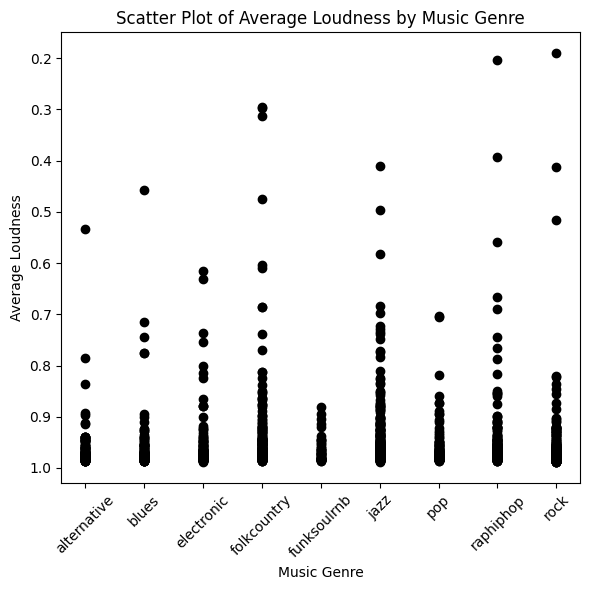

In [ ]:
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('muusika_andmed_3.csv')

# Extract the relevant columns
data1 = df[['average_loudness', 'genre']]

# Set the color for all scatter points to black
color = 'black'

# Plot the scatter points
plt.figure(figsize=(6, 6))  # Adjust the figure size
plt.scatter(data1['genre'], data['average_loudness'], color=color)

# Set the axis labels and title
plt.xlabel('Music Genre')
plt.ylabel('Average Loudness')
plt.title('Scatter Plot of Average Loudness by Music Genre')

# Invert the y-axis
plt.gca().invert_yaxis()

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Optional: Adjust the layout to prevent overlapping labels
plt.show()

danceability

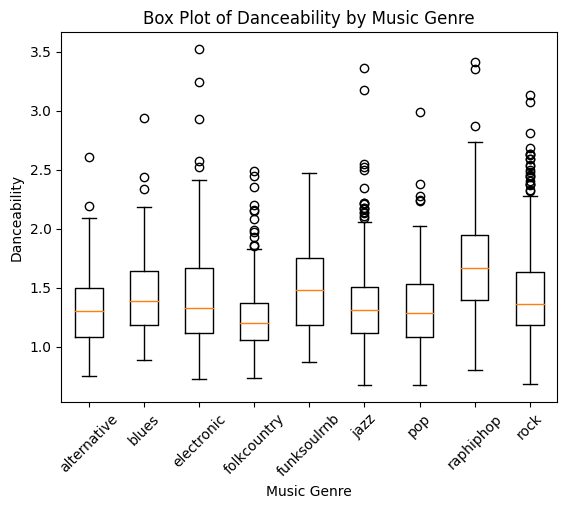

In [ ]:
# Extract the relevant columns
data2 = df[['danceability', 'genre']]

# Create a dictionary to store the BPM values for each genre
bpm_data = {}

# Iterate over each genre and collect the corresponding BPM values
for genre in data2['genre'].unique():
    bpm_data[genre] = data2[data['genre'] == genre]['danceability']

# Convert the dictionary to a list of values
bpm_values = list(bpm_data.values())

# Create a list of genre labels
genre_labels = list(bpm_data.keys())

# Plot the box plot
plt.boxplot(bpm_values, labels=genre_labels)

# Set the axis labels and title
plt.xlabel('Music Genre')
plt.ylabel('Danceability')
plt.title('Box Plot of Danceability by Music Genre')

# Rotate the x-axis labels
plt.xticks(rotation=45)


# Show the plot
plt.show()

spectral_entropy

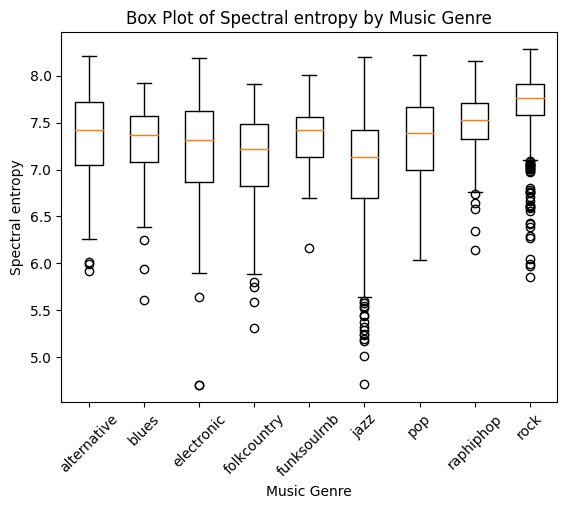

In [ ]:
# Extract the relevant columns
data3 = df[['spectral_entropy', 'genre']]

# Create a dictionary to store the BPM values for each genre
bpm_data = {}

# Iterate over each genre and collect the corresponding BPM values
for genre in data3['genre'].unique():
    bpm_data[genre] = data3[data['genre'] == genre]['spectral_entropy']

# Convert the dictionary to a list of values
bpm_values = list(bpm_data.values())

# Create a list of genre labels
genre_labels = list(bpm_data.keys())

# Plot the box plot
plt.boxplot(bpm_values, labels=genre_labels)

# Set the axis labels and title
plt.xlabel('Music Genre')
plt.ylabel('Spectral entropy')
plt.title('Box Plot of Spectral entropy by Music Genre')

# Rotate the x-axis labels
plt.xticks(rotation=45)


# Show the plot
plt.show()

BPM

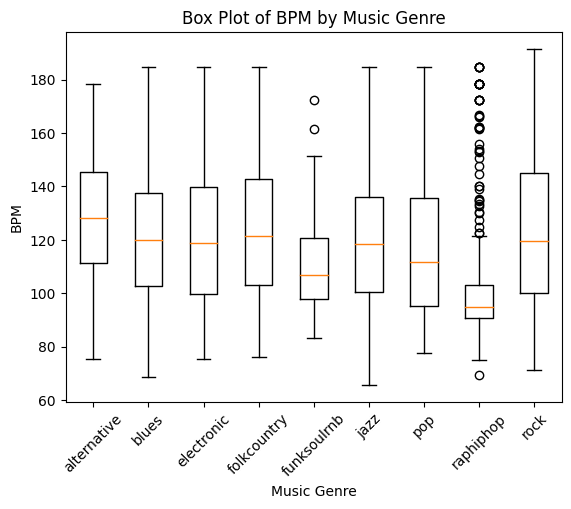

In [ ]:
# Extract the relevant columns
data4 = df[['BPM', 'genre']]

# Create a dictionary to store the BPM values for each genre
bpm_data = {}

# Iterate over each genre and collect the corresponding BPM values
for genre in data4['genre'].unique():
    bpm_data[genre] = data4[data4['genre'] == genre]['BPM']

# Convert the dictionary to a list of values
bpm_values = list(bpm_data.values())

# Create a list of genre labels
genre_labels = list(bpm_data.keys())

# Plot the box plot
plt.boxplot(bpm_values, labels=genre_labels)

# Set the axis labels and title
plt.xlabel('Music Genre')
plt.ylabel('BPM')
plt.title('Box Plot of BPM by Music Genre')

# Rotate the x-axis labels
plt.xticks(rotation=45)


# Show the plot
plt.show()

Üleval on toodud mõned visualisatsioonid andmetest. Üldiselt nägime, et andmetes selgelt eristuvaid erinevusi ei ole – ei leidnud tunnust, mis kirjeldaks muusikažanreid teistest paremini, ning seetõttu kasutasime mudeli loomisel mitu tunnust korraga.

In [ ]:
# Count the occurrences of each genre
genre_counts = data['genre'].value_counts()

# Print the genre counts
print(genre_counts)

rock           504
jazz           319
raphiphop      300
folkcountry    222
alternative    143
blues          120
pop            116
electronic     113
funksoulrnb     47
Name: genre, dtype: int64


Ülevalt on näha, et  žanrite ridade arvus on väga suured erinevused.

## MUDELI LOOMINE

Hetkel jätame skaleerimata ja kasutame random foresti mudelit. Iga mudeli juures kasutame mudeli headuse hindamiseks "accuracy"-t

In [ ]:
X = data[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]
y = data['genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the genre of the test data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4854111405835544


Skaleerime andmeid (undersampling) ja vaatame, kas tulemus paraneb

In [ ]:
genre_counts = data['genre'].value_counts()

# Set the desired number of samples per genre
desired_samples = genre_counts.min()

# Perform balanced sampling
balanced_data = pd.DataFrame()
for genre in genre_counts.index:
    genre_data = data[data['genre'] == genre].sample(n=desired_samples, random_state=42)
    balanced_data = pd.concat([balanced_data, genre_data])

# Separate the features and target variable
y = balanced_data['genre']
X = balanced_data[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the genre of the test data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.35294117647058826


Tulemus läks halvemaks, teeme oversamplimist

In [ ]:
from imblearn.over_sampling import SMOTE
# Separate the features and target variable
X = data[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]
y = data['genre']

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Random Forest classifier
classifier = RandomForestClassifier()

# Train the classifier
classifier.fit(X_train, y_train)

# Predict the genre of the test data
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.7929515418502202


Tulemus on meie jaoks rahuldaval tasemel. Edasi proovime teisi tuntuid mudeleid

Proovime KNN-i

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X = data[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]
y = data['genre']

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a KNN classifier
classifier1 = KNeighborsClassifier()

# Train the classifier
classifier1.fit(X_train, y_train)

# Predict the genre of the test data
y_pred = classifier1.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.539647577092511


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

X = data[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]
y = data['genre']

# Apply SMOTE for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_encoded, test_size=0.2, random_state=42)



# Convert data into DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for the GBM
params = {
    'objective': 'multi:softmax',
    'num_class': len(data['genre'].unique()),  # Number of classes
    'eval_metric': 'merror'
}

# Train the GBM model
classifier2 = xgb.train(params, dtrain)

# Predict the genre of the test data
y_pred = classifier2.predict(dtest)

# Convert the predicted labels to integers
y_pred = y_pred.astype(int)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6497797356828194


Leidsime, et Random Forest Classifier oli kõige täpsem

## "Päris elus" testimine, DEMO

Selleks, et testida, tõmbasime 5 lugu youtubest alla, lõikasin nad 10 sekundi pikkuseks ning tegin uue tabeli muusika_testimine. Kui lugusid alla laadida tuleb kindlasti laadida 128k versioon, sest see mõjutab tulemusi.

In [ ]:
data_test = pd.read_csv('muusika_testimine.csv')
data_test.head(5)

,song_name,average_loudness,BPM,energy,genre,beats_loudness,silence_rate_60dB,danceability,chords_changes_rate,melbands_spread,hpcp_entropy,barkbands_crest,dissonance,bpm_histogram_first_peak_weight,zerocrossingrate,spectral_entropy
0,AC_DC-TNT,0.972855,126.535721,0.013236,testimine,0.023254,0.138158,1.498110,0.113537,38.512177,2.242369,9.066400,0.473691,0.619048,0.070240,7.492852
1,Britney_Spears-Oops_I_did_it_again,0.984057,96.918510,0.041898,testimine,0.054016,0.004274,0.000000,0.042373,24.757929,1.721725,11.269362,0.445749,0.428571,0.086426,7.747435
2,eminem-Drug_Ballad_luhike,0.987267,104.787598,0.040447,testimine,0.089545,0.025000,5.639791,0.072398,22.276974,2.241017,14.272150,0.451732,0.437500,0.061091,7.485629
3,John_Coltraine-My_Favourite_Things,0.977362,84.839928,0.035817,testimine,0.044837,0.004505,1.271835,0.022422,14.030258,1.555837,11.368202,0.410251,0.769231,0.036125,7.000568
4,War-Low_Rider,0.978087,139.025085,0.025300,testimine,0.035378,0.052000,1.502593,0.107570,30.931055,2.391810,8.821373,0.468090,0.560000,0.073674,7.718951


In [ ]:
 import numpy as np


# into [] write the number of row you want to predict
new_row = data_test.iloc[0]

# Extract the desired features from the row
new_row_processed = new_row[['average_loudness', 'BPM', 'energy', 'beats_loudness', 'silence_rate_60dB',
          'danceability', 'chords_changes_rate', 'melbands_spread', 'hpcp_entropy', 'barkbands_crest',
          'bpm_histogram_first_peak_weight', 'zerocrossingrate', 'spectral_entropy']]

# Reshape the new row to have shape (1, number_of_features)
new_row_processed = np.array(new_row_processed).reshape(1, -1)

# Predict the genre for the new row
predicted_genre = classifier.predict(new_row_processed)

print('Predicted Genre:', predicted_genre)


Predicted Genre: ['blues']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## KOKKUVÕTE, EDASISED TEGEVUSED


Random forest classifier andis kõige parema tulemuse ja siis kui kasutatada oversamplimist, et igat klassi oleks sama palju. Täpsuse saime 80% lähedale, mis on hea tulemus ja hetkel meie töö mahtu arvestades rahuldav.

Youtubest alla laetud lugude peal mudel nii hästi ei töödanud. Tõenäoliselt saaks täpsust parandada, kui veel lisada tunnuseid mudeli loomisel. Selleks tuleks muuta scripti, mis tabeli koostab. Praegu tuleb tunnuste juurde lisamiseks teha käsitööd liiga palju(kindlasti on võimalus, kuidas antud formaat "lamedaks" teha, aga hetkel ei suutnud seda välja mõelda)

Teine võimlus mudelit parandada oleks kasutada mudeli treenimiseks tuntumaid lugusid, praegused lood on sellised, mis ei ole kunagi maailmas läbi löönud.

Edasi tuleks muuta transform skripti, et kogu andmestik json failist kätte saada. Samuti tuleks luua programm, et erinevate rakenduste vahel ei peaks faile tõstma ning kogu voog töötaks automaatselt